# Importing Necessary Modules

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)
import seaborn as sns
sns.set(style='whitegrid', color_codes=True)
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import chi2,f_classif, mutual_info_classif, SelectKBest
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# Load Dataset

In [2]:
df = pd.read_csv('~/Documents/GitHub/Breast-Cancer-Prediction-Analysis/Dataset/breast_cancer_dataset_wisnconsin_diagonistic.csv')
df.head(12)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.drop(['id'], axis=1, inplace=True)
df.drop(['Unnamed: 32'], axis=1, inplace=True)

In [5]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

B    357
M    212
Name: diagnosis, dtype: int64


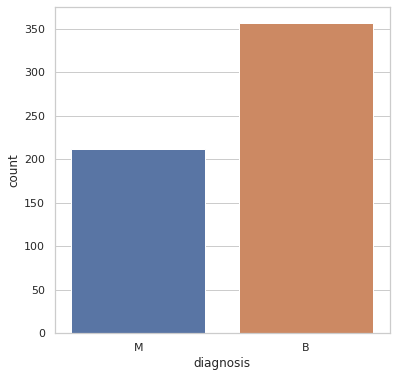

In [6]:
print(df['diagnosis'].value_counts())
plt.figure(figsize=(6, 6))
sns.countplot(
    x='diagnosis',
    data=df
);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [8]:
df["diagnosis"].replace({"M": 1, "B": 0}, inplace=True)

# Feature Importance & Correlations

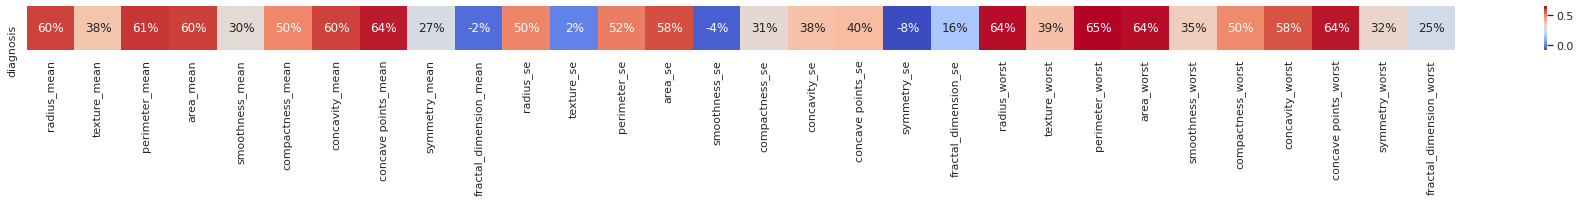

In [9]:
# Numerical Input - Categorical Output
# Kendall's Method
plt.figure(figsize=(32, .8))
sns.heatmap(
    data=df.corr("kendall").iloc[:1, 1:],
    annot=True,
    fmt='.0%',
    cmap='coolwarm'
        
);

In [10]:
X = df[
    [
        'area_mean',
        'area_se',
        'area_worst',
        'compactness_mean',
        'compactness_se',
        'compactness_worst',
        'concave points_mean',
        'concave points_se',
        'concave points_worst',
        'concavity_mean',
        'concavity_se',
        'concavity_worst',
        #'fractal_dimension_mean',
        'fractal_dimension_se',
        'fractal_dimension_worst',
        'perimeter_mean',
        'perimeter_se',
        'perimeter_worst',
        'radius_mean',
        'radius_se',
        'radius_worst',
        'smoothness_mean',
        #'smoothness_se',
        'smoothness_worst',
        'symmetry_mean',
        #'symmetry_se',
        'symmetry_worst',
        'texture_mean',
        #'texture_se',
        'texture_worst'
    ]
]

In [11]:
y = df.iloc[:,:1]

# Split The Dataset

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify= y)

# Robust Scaling

In [13]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_train = pd.DataFrame(X_train)

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test)


# Setting Column Names from dataset
X_train.columns = X.columns
X_test.columns = X.columns

# Resampling

In [14]:
from imblearn.combine import SMOTEENN

resample = SMOTEENN(sampling_strategy='auto', random_state =0)
X_train, y_train = resample.fit_sample(X_train, y_train)

In [15]:
X_test.shape

(114, 26)

In [16]:
X_train.shape

(532, 26)

# SVM

In [17]:
from sklearn.svm import SVC

In [18]:
svm = SVC(kernel="rbf", gamma='auto', random_state=0)

In [19]:
svm.fit(X_train, y_train)

SVC(gamma='auto', random_state=0)

In [20]:
svm.score(X_train, y_train)

1.0

In [21]:
svm.score(X_test, y_test)

0.9473684210526315

In [22]:
from sklearn.metrics import classification_report
y_test_pred = svm.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        72
           1       0.91      0.95      0.93        42

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



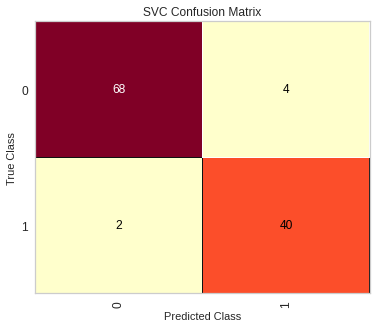

In [23]:
from yellowbrick.classifier import confusion_matrix

plt.figure(figsize=(6, 5))
visualizer = confusion_matrix(
    svm,
    X_test, y_test,
    is_fitted=True
    
)
visualizer.show();

## Cross validation and Learning Curve

In [24]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(
    n_splits=10,random_state=0,
    shuffle=True
)

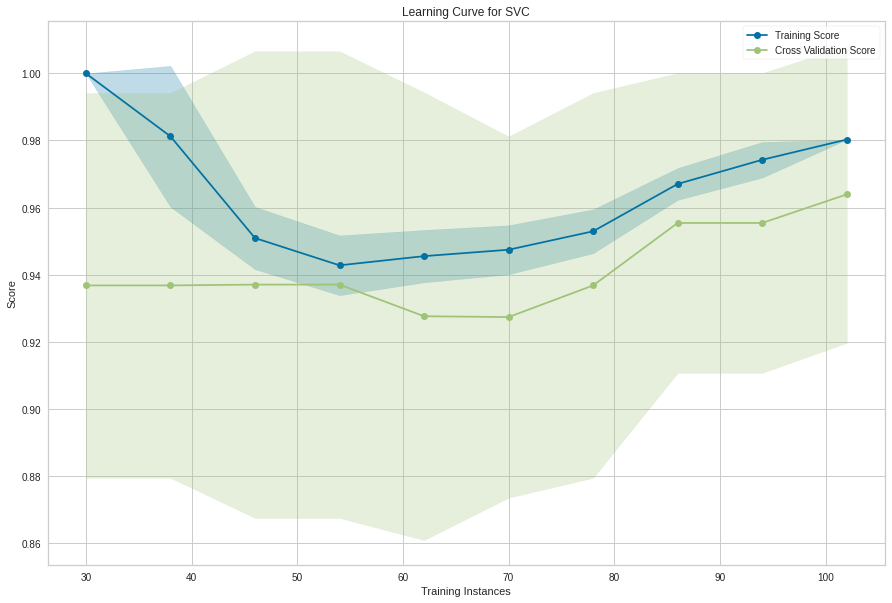

In [25]:
from yellowbrick.model_selection import LearningCurve
model = SVC(kernel="rbf", gamma='auto', random_state=0)

plt.figure(figsize=(15, 10))
visualizer = LearningCurve(
    model= model, 
    cv=cv, 
    scoring='f1_weighted', 
    train_sizes=np.linspace(0.3, 1.0, 10), 
    n_jobs=4,
    is_fitted=False,
    stratify = True
)
visualizer.fit(X_test, y_test);
visualizer.show();

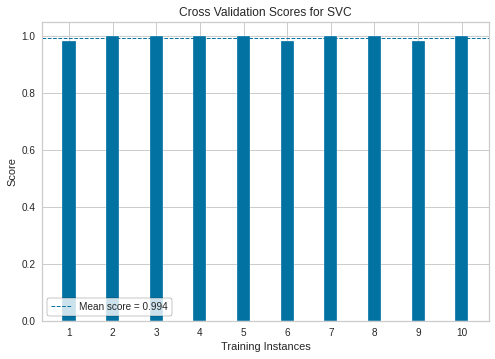

In [26]:
from yellowbrick.model_selection import CVScores

model = SVC(kernel="rbf", gamma='auto', random_state=0)
visualizer = CVScores(model, cv=cv, scoring='f1_weighted', is_fitted=False, stratify = True)

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

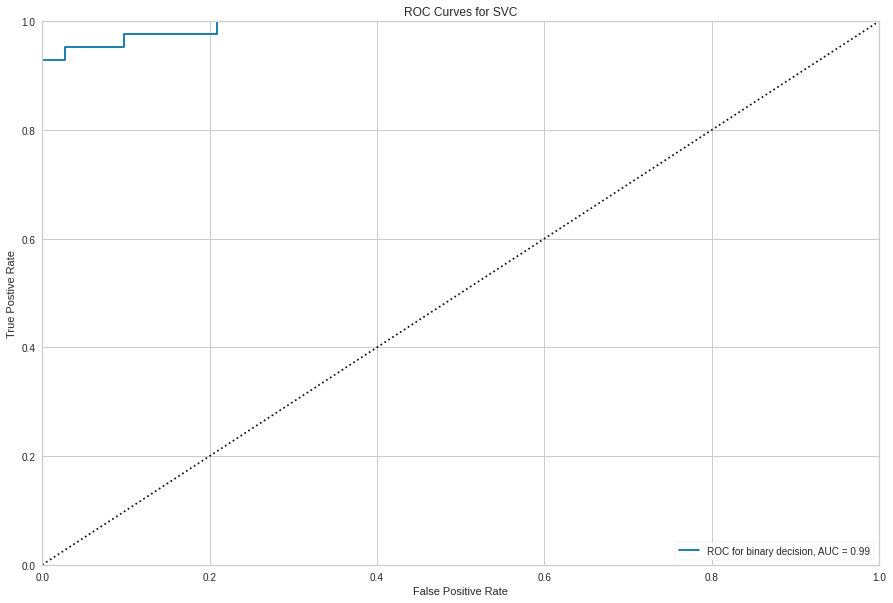

In [27]:
from yellowbrick.classifier import ROCAUC

plt.figure(figsize=(15, 10))
visualizer = ROCAUC(
    svm,
    is_fitted=True,
    macro = False,
    micro = False,
    per_class= False
)
visualizer.score(X_test, y_test)
visualizer.show();